[1. 可视化中 convnet 的中间激活](#1.-可视化中-convnet-的中间激活)：将每个通道的内容分别绘制成二维图像

[2. 可视化卷积神经网络的过滤器](#2.-可视化-convnet-的过滤器)

[3. 可视化类激活的热力图](#3.可视化类激活的热力图)

In [1]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

np.random.seed(42)
tf.random.set_seed(42)

os.environ['CUDA_VISIBLE_DEVICES'] = '2'

**convnet 学到的表示非常适合可视化，很大程度上是因为它们是视觉概念的表示。**

这里，介绍 3 种可视化方法：

-  <font color='blue'><b>可视化 convnet 的中间输出 (中间激活)</b></font>：<font color='crimson'>有助于理解 convnet 连续的层如何 对输入进行变换，也有助于初步了解 convnet 每个过滤器的含义。</font>


- <font color='blue'><b>可视化 convnet 的过滤器</b></font>：<font color='crimson'>有助于精确理解 convnet 中每个过滤器容易接受的视觉模式或视觉概念。</font>


- <font color='blue'><b>可视化图像中类激活的热力图</b></font>：<font color='crimson'>有助于理解图像的哪个部分被识别为属于某个类别，从而可以定位图像中的物体。</font>

# 1. 可视化中 convnet 的中间激活

<font color='crimson'>指对于给定输入，展示网络中各个卷积层和池化层输出的特征图 (层的输出通常被称为该层的激活，即激活函数的输出)。</font>

在三个维度对特征图进行可视化：宽度、高度和深度 (通道)。每个通道都对应相对独立的特征，所以<font color='crimson'>将这些特征图可视化的正确方法是将每个通道的内容分别绘制成二维图像</font>。

In [2]:
# Load the saved model (使用数据增强从头训练的模型)
model = tf.keras.models.load_model('models/chap05-models/cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [3]:
# Process a single image
img_path = '/home/libing/datasets/dogs_vs_cats_small/test/cats/cat.1700.jpg'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
img_tensor = tf.keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

img_tensor.shape

(1, 150, 150, 3)

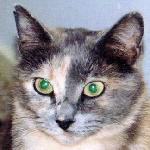

In [4]:
img

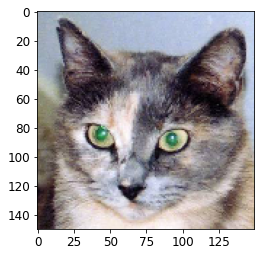

In [5]:
plt.imshow(img_tensor[0])
plt.show()

<font color='crimson'>为了提取想要查看的特征图，需要创建一个模型，以图像批量作为输入，并输出所有卷积层和池化层的激活。此时，需要使用 `tf.keras.Model` 类。</font>

`tf.keras.Model` 类允许模型有多个输出，这一点与 `tf.keras.Sequential` 模型不同。

In [6]:
# Instantiate a model from an input tensor and a list of output tensors

# 提取前 8 层的输出
layer_outputs = [layer.output for layer in model.layers[:8]]
# 创建一个模型，给定模型输入
activation_model = tf.keras.Model(inputs=model.input,
                                  outputs=layer_outputs)
activation_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0     

In [7]:
activation_model.output_names

['conv2d',
 'max_pooling2d',
 'conv2d_1',
 'max_pooling2d_1',
 'conv2d_2',
 'max_pooling2d_2',
 'conv2d_3',
 'max_pooling2d_3']

In [8]:
activation_model.output_shape

[(None, 148, 148, 32),
 (None, 74, 74, 32),
 (None, 72, 72, 64),
 (None, 36, 36, 64),
 (None, 34, 34, 128),
 (None, 17, 17, 128),
 (None, 15, 15, 128),
 (None, 7, 7, 128)]

In [9]:
activation_model.outputs

[<tf.Tensor 'conv2d/Identity:0' shape=(None, 148, 148, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d/Identity:0' shape=(None, 74, 74, 32) dtype=float32>,
 <tf.Tensor 'conv2d_1/Identity:0' shape=(None, 72, 72, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_1/Identity:0' shape=(None, 36, 36, 64) dtype=float32>,
 <tf.Tensor 'conv2d_2/Identity:0' shape=(None, 34, 34, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_2/Identity:0' shape=(None, 17, 17, 128) dtype=float32>,
 <tf.Tensor 'conv2d_3/Identity:0' shape=(None, 15, 15, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_3/Identity:0' shape=(None, 7, 7, 128) dtype=float32>]

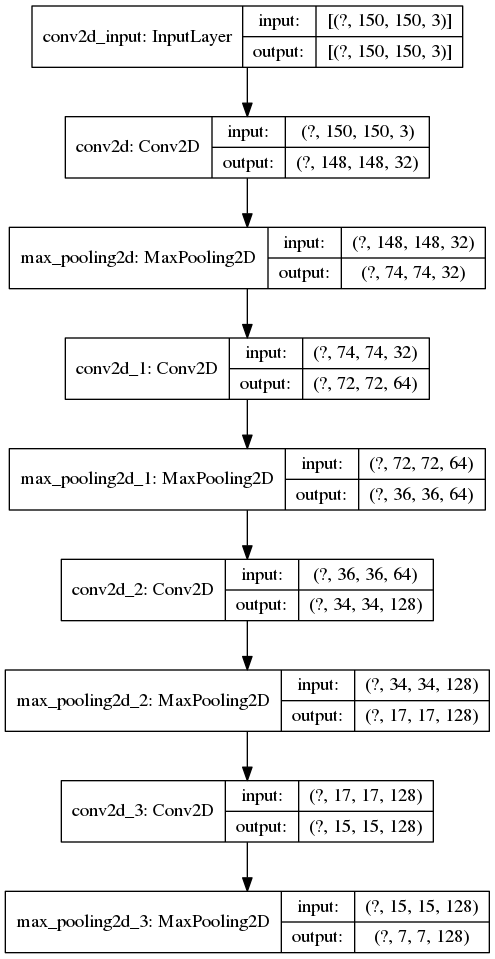

In [10]:
tf.keras.utils.plot_model(activation_model,
                          'figs/chap05-figs/model_fig_used_in_chap05_3.png',
                          show_shapes=True)

**输入一张图像，这个模型将返回原始模型前 8 层的激活值。这是一个多输出模型，这个模型有 8 个输出，即每层激活对应一个输出。**

In [11]:
model.predict(img_tensor)

array([[0.04229751]], dtype=float32)

In [12]:
model.predict_classes(img_tensor)

array([[0]], dtype=int32)

In [13]:
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator = train_data_gen.flow_from_directory(
    directory='/home/libing/datasets/dogs_vs_cats_small/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [14]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [15]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [16]:
# 以预测模式运行模型
activations = activation_model.predict(img_tensor)
len(activations)

In [20]:
# 列表 activations 中每个元素对应一个层的输出/激活
for activation in activations:
    print(activation.shape)

(1, 148, 148, 32)
(1, 74, 74, 32)
(1, 72, 72, 64)
(1, 36, 36, 64)
(1, 34, 34, 128)
(1, 17, 17, 128)
(1, 15, 15, 128)
(1, 7, 7, 128)


In [21]:
# 第一个卷积层激活
first_layer_activation = activations[0]
first_layer_activation.shape

(1, 148, 148, 32)

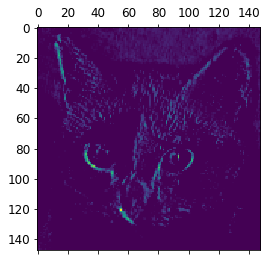

In [44]:
# 绘制模型第一层激活的第 14 个 channel
plt.matshow(first_layer_activation[0, :, :, 14], cmap='viridis')
plt.show()

这个似乎是对角边缘检测器。

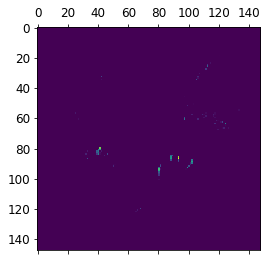

In [64]:
# 绘制模型第一层激活的第 30 个 channel
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')
plt.show()

这个可能对寻找猫眼睛很有用。

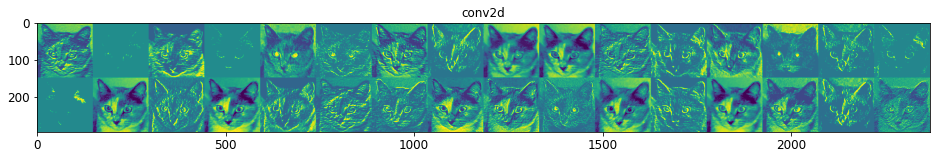

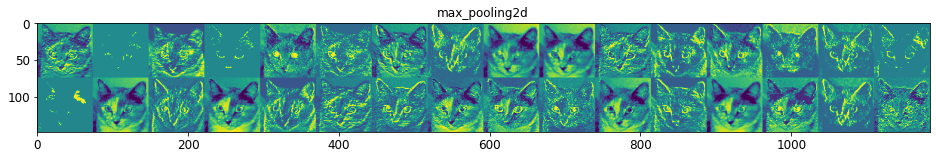

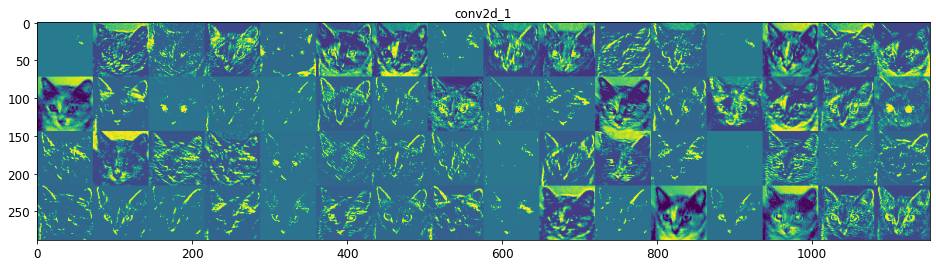

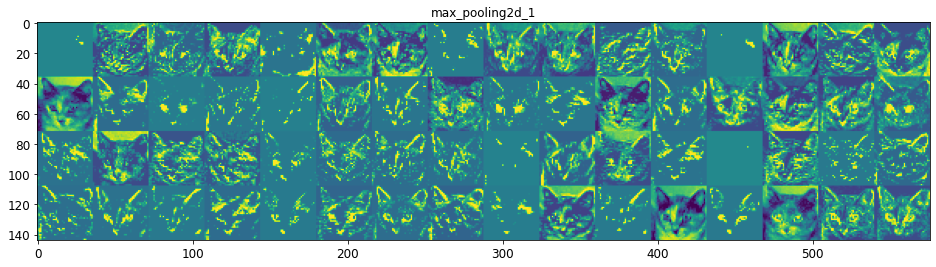

/home/libing/.conda/envs/dl-lb/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


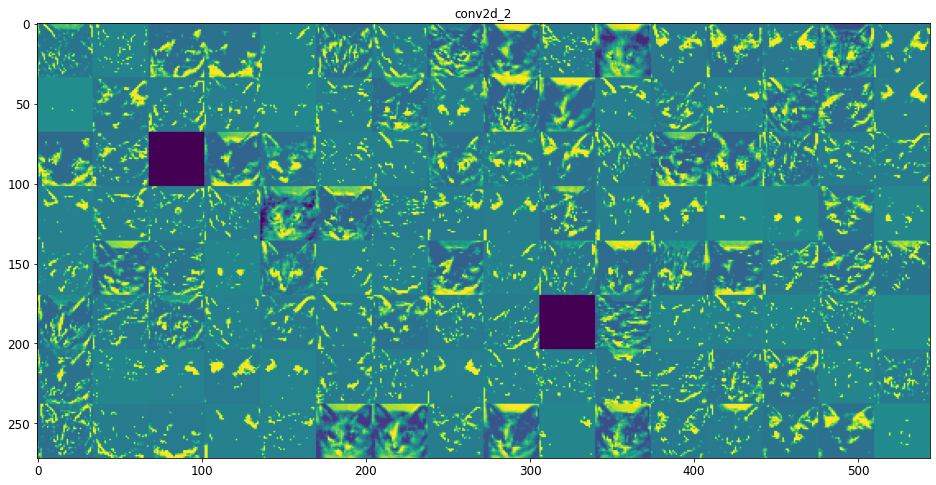

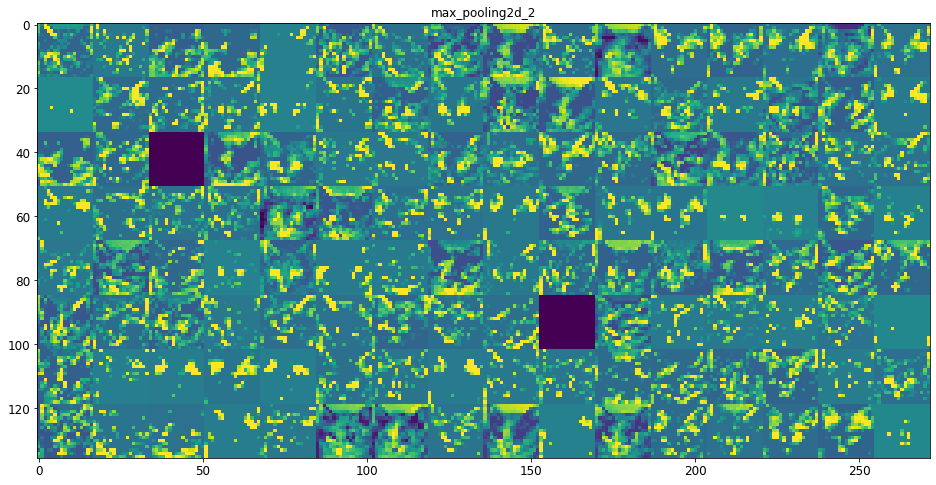

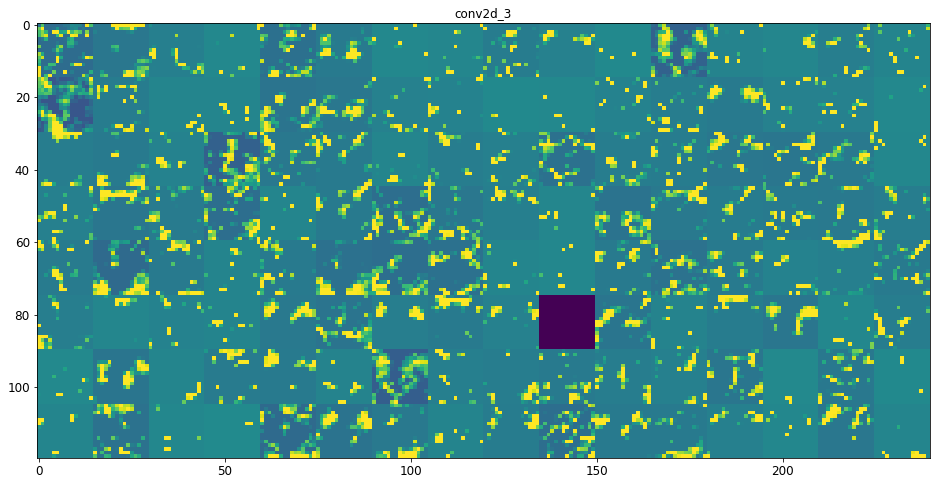

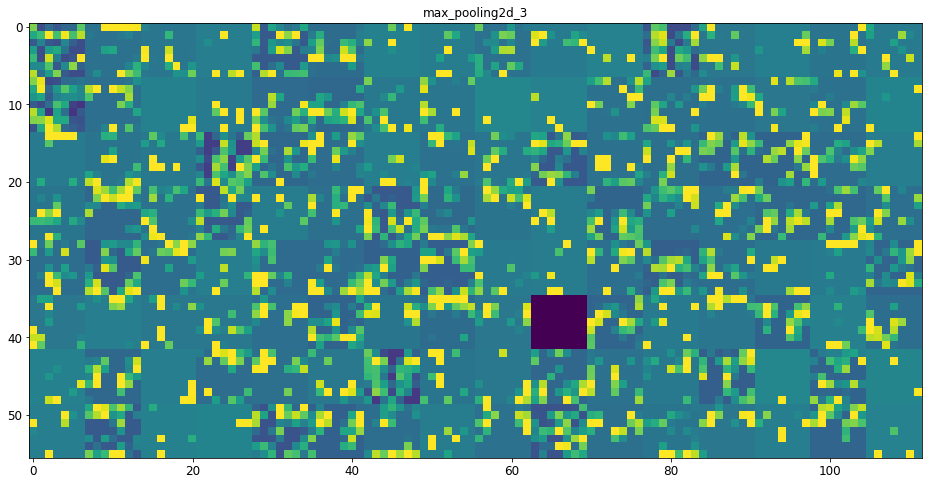

In [28]:
# 将每个中间激活层的所有 channel 可视化
layer_names = []  # 层的名称
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16
# 每层一个名称，一个激活
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]  # 每层的 channel 数
    # 特征图shape: (1, size, size, n_features)
    size = layer_activation.shape[1]  # 每个激活/特征图的大小

    # 每行绘制 images_per_row=16 个 channel，需要的总行数
    n_cols = n_features // images_per_row
    display_grid = np.zeros(shape=(size*n_cols, images_per_row*size))

    for col in range(n_cols):  # 行数
        for row in range(images_per_row):  # 每行图片/channel 数
            channel_iamge = layer_activation[0, :, :, col*images_per_row+row]
            # 对特征进行处理，使其看起来更加美观
            channel_iamge -= channel_iamge.mean()
            channel_iamge /= channel_iamge.std()
            channel_iamge *= 64
            channel_iamge += 128
            channel_iamge = np.clip(channel_iamge, 0, 255).astype('uint8')
            display_grid[col*size:(col+1)*size, row*size:(row+1)*size] = channel_iamge

    scale = 1./size
    plt.figure(figsize=(scale*display_grid.shape[1],
                        scale*display_grid.shape[0]))
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.title(layer_name)
    plt.grid(False)
    plt.show()

<div class="alert alert-block alert-warning">
    1) <font color='crimson'>第一层是各种边缘探测器的集合。在这一阶段，激活几乎保留了原始图像中的所有信息。</font><br><br>
    2) <font color='crimson'>随着层数的加深，激活变得越来越抽象，并且越来越难以直观地理解。</font>它们开始表示更高层次的概念，比如“猫耳朵”和“猫眼睛”。<font color='crimson'>层数越深，其表示中关于图像视觉内容的信息就越少，而关于类别的信息就越多。</font><br><br>
    3) <font color='crimson'>激活的稀疏度 (sparsity) 随着层数的加深而增大。</font>在第一层里，所有过滤器都被输入图像激活，但在后面的层里，越来越多的过滤器是空白的。也就是说，输入图像中找不到这些过滤器所编码的模式。<br><br>
    <b><font color='blue'>DL 网络学到的表示的一个重要普遍特征：随着层数的加深，层所提取的特征变得越来越抽象。更高的层激活包含关于特定输入的信息越来越少，而关于目标的信息越来越多。</font></b><br><br>
    <font color='crimson'>深度神经网络可以有效地作为信息蒸馏管道 (information distillation pipeline)，输入原始数据 (这里是 RGB 图像)，反复对其进行变换，将无关信息过滤掉 (比如图像的具体外观)，并放大和细化有用的信息(比如图像的类别)。</font>
</div>

# 2. 可视化 convnet 的过滤器

# 3.可视化类激活的热力图